<a href="https://colab.research.google.com/github/MK49594/Activity-3-/blob/main/Activity3_Mariam_Khalid_U23102355.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [85]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [86]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [88]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [89]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [90]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-90-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [91]:
#merged_data.dtypes

In [92]:
pollution_data = merged_data[['pm10','neighborhood']]

In [93]:
pollution_data.shape[0]

118495

In [94]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [95]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [96]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [97]:
pollution_data['pm10'].min()

0.0

In [98]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [99]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [100]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [101]:
joined_table = joined_table.where('pm10', are.below(300))

In [102]:
len(joined_table)

2

In [103]:
joined_table.num_rows

117356

#Remove high outliers (pm10 > 300)

In [104]:
from datascience import are
joined_table = joined_table.where('pm10', are.below(300))
print("Filtered rows:", joined_table.num_rows)


Filtered rows: 117356


### **Randomly sample 10% of the rows from the joined_table without replacement.**

In [105]:
sample_size = int(0.10 * joined_table.num_rows)
sample_table = joined_table.sample(sample_size, with_replacement=False)

### **Compute mean of sampled pm10**




In [106]:
mean_pm10_sample = np.mean(sample_table.column('pm10'))
print("Sample Mean PM10:", mean_pm10_sample)

Sample Mean PM10: 16.6413123136


### **Create an empirical histogram of the pm10 values from the sampled data using 10 bins.**

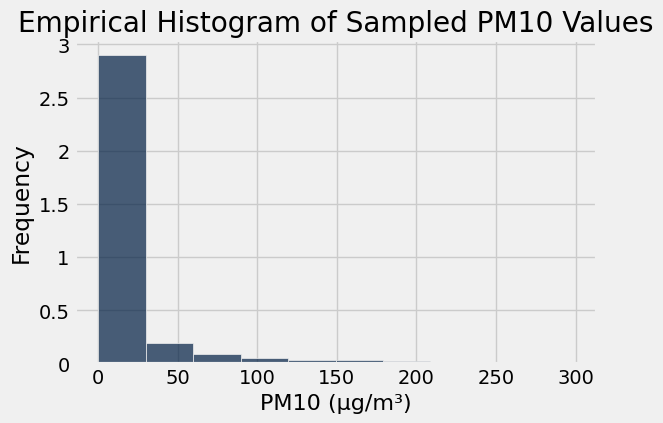

In [107]:
sample_table.select('pm10').hist(bins=10)
plt.title('Empirical Histogram of Sampled PM10 Values')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

## **Compare with full dataset**

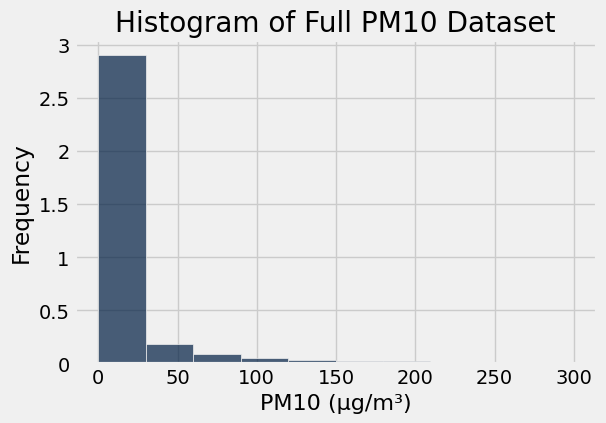

In [108]:
joined_table.select('pm10').hist(bins=10)
plt.title('Histogram of Full PM10 Dataset')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.show()



### **The Sample Mean PM10 is:** 16.64 µg/m³

### **Observation:**
Both the sampled and full dataset histograms show a strong right-skewed distribution with most PM10 values clustered between 0–50 µg/m³. Only a few values extend beyond this range.

### **Final Conclusion:**
The histogram of the random 10% sample closely matches that of the full dataset, preserving its shape and skew. This indicates that the sampling was representative and unbiased. Most PM10 levels are low, reflecting generally clean air across NYC. The consistency in distribution supports the use of random sampling in air quality analysis.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

### **Extract PM10 values , Create a table with PM10 values only**

In [109]:
#Create a table with PM10 values only
pm10_table = Table().with_column('pm10', joined_table.column('pm10'))

In [121]:
#Estimate the median from the original dataset
original_median = percentile(50, joined_table.column('pm10'))
print("Estimated median PM10 (original dataset):", original_median)

Estimated median PM10 (original dataset): 3.14


In [110]:
#Define one bootstrap resample for the median
def one_bootstrap_median():
    resample = pm10_table.sample()
    return percentile(50, resample.column('pm10'))

### **Bootstrap 5,000 medians**

In [111]:
#Repeat this 5,000 times
num_repetitions = 5000
bootstrap_medians = make_array()

for i in np.arange(num_repetitions):
    bootstrap_medians = np.append(bootstrap_medians, one_bootstrap_median())

## **Compute 95% confidence interval**;  (2.5th to 97.5th percentile)

In [112]:
#Calculate 95% confidence interval using percentiles
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
print('95% Confidence Interval for Median PM10:', left, 'to', right)

95% Confidence Interval for Median PM10: 3.1 to 3.19


### **Visualize the distribution of bootstrapped medians**
Visualize histogram and CI

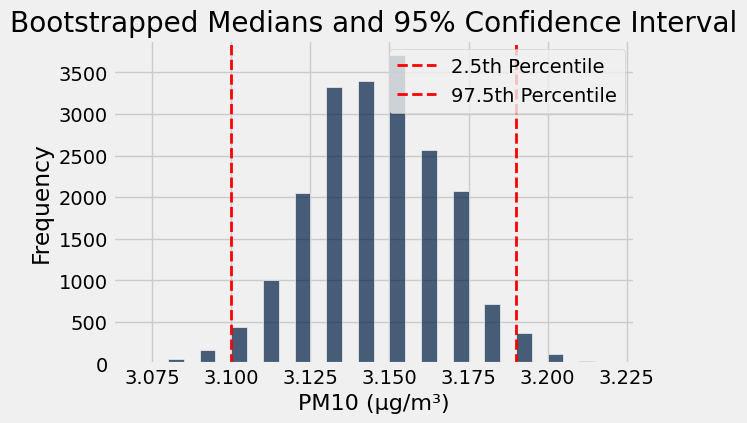

In [113]:
#Histogram with CI overlay
Table().with_column('Bootstrapped Medians', bootstrap_medians).hist(bins=30)
plt.axvline(left, color='red', linestyle='--', linewidth=2, label='2.5th Percentile')
plt.axvline(right, color='red', linestyle='--', linewidth=2, label='97.5th Percentile')
plt.title('Bootstrapped Medians and 95% Confidence Interval')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*   ### **95% CI for Median PM10: [3.10, 3.19] µg/m³**
*   ### Estimated median PM10 (original dataset): **3.14 µg/m³**

### **Final Conclusion:**
Using 5,000 bootstrap samples, we estimate that **the median PM10 level in NYC** is **3.14 µg/m³**, with a **95% confidence interval** of **[3.10, 3.19] µg/m³.**
This narrow interval shows very little variation, meaning the typical pollution level is consistent across the dataset.
In simple terms, most neighborhoods had **very low PM10 pollution**, and we can be confident that this is true for the overall population as well.

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

## **Create a Table with just the PM10 values**

In [114]:
pm10_table = Table().with_column('pm10', joined_table.column('pm10'))

## **Bootstrap Function for the Mean**

In [115]:
#One bootstrap resample mean
def one_bootstrap_mean():
    resample = pm10_table.sample()
    return np.mean(resample.column('pm10'))

#Run 5,000 bootstrap resamples
num_repetitions = 5000
bootstrap_means = make_array()

for i in np.arange(num_repetitions):
    bootstrap_means = np.append(bootstrap_means, one_bootstrap_mean())

## **Compute the 95% Confidence Interval for the Mean**

In [116]:
#Construct 95% confidence interval
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)
print('95% Confidence Interval for Mean PM10:', left, 'to', right)

95% Confidence Interval for Mean PM10: 15.9659802652 to 16.3880025734


## **Visualize and Check if 20 µg/m³ is in the Interval**

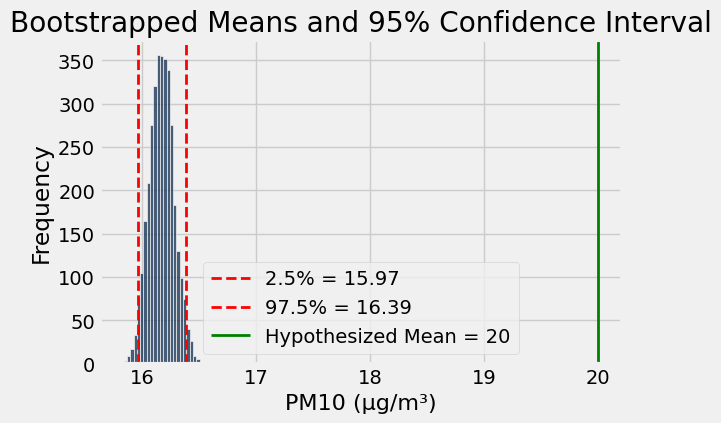

In [117]:
#Visualization (histogram + CI + hypothesized mean)
Table().with_column('Bootstrapped Means', bootstrap_means).hist(bins=30)
plt.axvline(left, color='red', linestyle='--', linewidth=2, label=f'2.5% = {left:.2f}')
plt.axvline(right, color='red', linestyle='--', linewidth=2, label=f'97.5% = {right:.2f}')
plt.axvline(20, color='green', linestyle='-', linewidth=2, label='Hypothesized Mean = 20')
plt.title('Bootstrapped Means and 95% Confidence Interval')
plt.xlabel('PM10 (μg/m³)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


- If 20 μg/m³ is **within** this interval → we **fail to reject** the null hypothesis.
- If 20 μg/m³ is **outside** this interval → we **reject** the null hypothesis.


95% CI for Mean PM10: **[15.97, 16.39] µg/m³**

Hypothesized Mean: **20 µg/m³**


### **Final Conclusion:**
The hypothesized mean of 20 µg/m³ **lies outside the 95% confidence interval** for the actual average PM10 level, **which is [15.97, 16.39] µg/m³.**
**Therefore, we reject the null hypothesis** and conclude there is statistically significant evidence that the average PM10 level in NYC is less than 20 µg/m³.

*    This result means that the air pollution (PM10) levels in New York City were lower than expected.
It could be because the city has done a good job controlling pollution, or because the air was naturally cleaner at the time the data was collected. Maybe due to weather, less traffic, or other temporary conditions.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


### **Group by Neighborhood and Find the top 3 neighborhoods with the highest mean PM10 then Get Mean PM10 for Each**

In [118]:
#Find the top 3 neighborhoods with the highest mean PM10
neighborhood_means = joined_table.group('neighborhood', np.mean)
top3 = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))
top3

neighborhood,pm10 mean
Crotona Park,53.4512
Pelham Bay,34.6071
Tremont,29.829


**Step 2: Define Bootstrap Function for Neighborhood Means**

In [119]:
#Define a bootstrap function to estimate mean PM10 for one neighborhood
def bootstrap_neighborhood_mean(neighborhood_name, repetitions):
    subset = joined_table.where('neighborhood', neighborhood_name)
    pm10_values = subset.column('pm10')

    means = make_array()
    for i in np.arange(repetitions):
        resample = np.random.choice(pm10_values, size=len(pm10_values), replace=True)
        resampled_mean = np.mean(resample)
        means = np.append(means, resampled_mean)
    return means

### **Generate 5,000 Bootstrap Samples for Each of Top 3 Neighborhoods & plot**

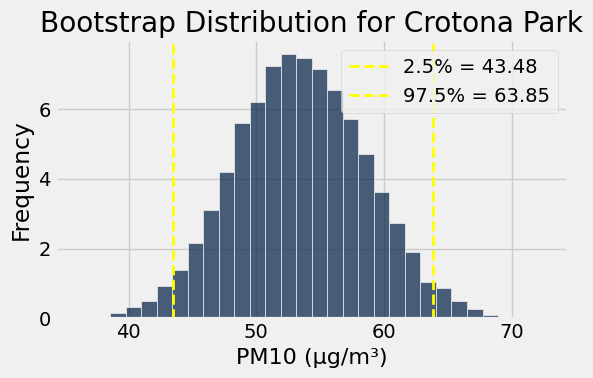

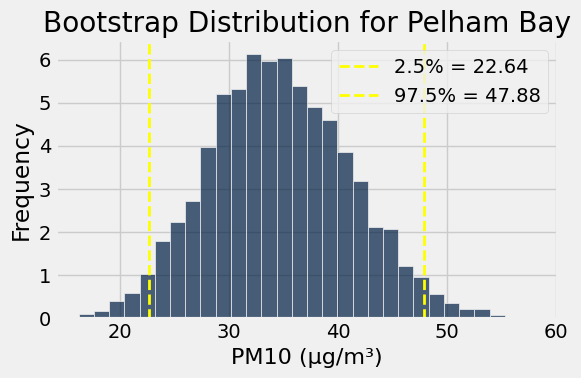

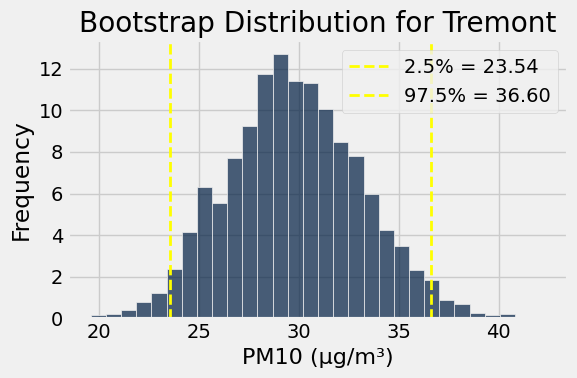

In [120]:
#Apply the bootstrap for each top 3 neighborhood
for name in top3.column('neighborhood'):
    means = bootstrap_neighborhood_mean(name, 5000)

    #Calculate 95% confidence interval
    left = percentile(2.5, means)
    right = percentile(97.5, means)

    #Plot the histogram with CI overlay
    Table().with_column(f'Mean PM10 - {name}', means).hist(bins=30)
    plt.axvline(left, color='yellow', linestyle='--', linewidth=2, label=f'2.5% = {left:.2f}')
    plt.axvline(right, color='yellow', linestyle='--', linewidth=2, label=f'97.5% = {right:.2f}')
    plt.title(f'Bootstrap Distribution for {name}')
    plt.xlabel('PM10 (µg/m³)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


### **Final Conclusion:**
For each of the top 3 neighborhoods, we used bootstrapping (5,000 samples each) to estimate their mean PM10 levels. The resulting histograms show approximately normal sampling distributions.
The 95% confidence intervals are:

*   **Crotona Park: [43.48, 63.85] µg/m³**

*   **Pelham Bay: [22.64, 47.88] µg/m³**

*   **Tremont: [23.54, 36.60] µg/m³**

These intervals indicate the variability of pollution across the most affected neighborhoods. Crotona Park clearly stands out with the highest pollution range. The analysis highlights local air quality concerns and helps guide targeted environmental action in high-risk areas.

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.